# Exercise Sheet 4

## Out of Vocabulary (OOV)
1)


In [1]:
from nltk.tokenize import RegexpTokenizer
import operator
import matplotlib.pyplot as plt

def get_tokens(text_file):
    
    # ingore white spaces and symbols
    tokenizer = RegexpTokenizer(r'\w+')
    
    # open the text file and extract the tokens
    with open(text_file, 'r', encoding='utf-8') as f:

        # tokenize text and remove punctuation
        tokens = tokenizer.tokenize(f.read())
    
    
        # lowercase tokens
        tokens = [x.lower() for x in tokens]
    return tokens

def create_vocab(text_file, vocab_size=-1):
    '''
    Returns the vocabulary of the input text of a given size. If vocab_size is -1, then all vocabularies will be included
    '''
    # extract tokens from text
    tokens = get_tokens(text_file)
        
    # count the frequencies
    vocab_dir = {}
    for word in tokens:
        vocab_dir[word] = vocab_dir.get(word, 0) + 1
        
    # sort by frequencies
    vocab_sorted = sorted(vocab_dir.items(), key=operator.itemgetter(1), reverse=True)

    # return the most frequent tokens with their frequencies
    vocab_sized = vocab_sorted[0:min(vocab_size, len(vocab_sorted))]
    
    # return only the words
    return [sample[0] for sample in vocab_sized]


def get_oov(vocabulary, text_file):
    
    # extract tokens from text
    tokens = get_tokens(text_file)
    
    oov_words = []
    
    for token in tokens:
        if token not in vocabulary:
            oov_words.append(token)
            
    return len(oov_words) / len(tokens)
    
# create vocabularies
vocabs = []
vocabs.append(create_vocab("Materials/train/train1.txt"))
vocabs.append(create_vocab("Materials/train/train2.txt"))
vocabs.append(create_vocab("Materials/train/train3.txt"))
vocabs.append(create_vocab("Materials/train/train4.txt"))
vocabs.append(create_vocab("Materials/train/train5.txt"))

# vocabulary sizes
vocab_sizes = [len(vocabulary) for vocabulary in vocabs]

# oov values of test text
oov_vals = [get_oov(vocabulary, "Materials/test/test.txt") for vocabulary in vocabs]

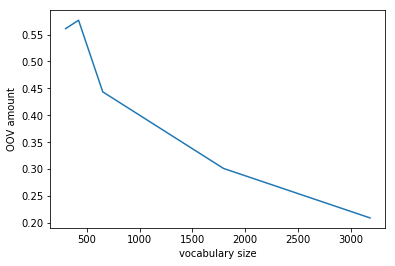

In [2]:
plt.plot(vocab_sizes, oov_vals)
plt.xlabel('vocabulary size')
plt.ylabel('OOV amount')
plt.show()

Explanation: When the vocabulary contains a small amount of words the probability that a word appears in a test text which is not in the vocabulary is higher then for vocabulary with a higher amount of words. Therefore, the larger the vocabulary size the lower will be the OOV value for a test set. <br><br>
OOV words might be probematic, as after learning a language model with training data, probability values are only computed for words in the (training) vocabulary. When computing a bigram probability in a certain test text it may happen that one of the two words is an OOV word and therefore does not have a trained probability i.e. its probability is 0. A 0-probability cannot be used for further computation. <br>
A solution is to apply a smoothing method, which prevents 0-probabilities. Smoothing "fakes" the occurrence of actual OOV words and therefore manages that these words do not appear with probability 0.